In [1]:
import pandas as pd
import numpy as np

from fbprophet import Prophet
import matplotlib.pyplot as plt

In [2]:
elec_df = pd.read_csv('../data/big_demand_temp_train.csv', index_col=0)
elec_df.rename({'demand' : 'y'}, axis=1, inplace=True)
elec_df['ds'] = elec_df.index
elec_df['ds'] = [elec_df.loc[x, 'ds'].split('+')[0] for x in elec_df.index]
elec_df.index = pd.DatetimeIndex(elec_df.index)
elec_df.shape

(32867, 17)

In [3]:
X_train = elec_df.iloc[:28000, :]
X_test = elec_df.iloc[28000:, :]

In [5]:
train_len = int(0.7 * elec_df.shape[0])
window_len = int(0.1 * elec_df.shape[0])

In [6]:
# Make the primary train/validation split
X_train = elec_df.iloc[:train_len, :]

# Make intermediate trail windows for walk forward validation
X_walk1 = elec_df.iloc[train_len:train_len+window_len, :]
X_walk2 = elec_df.iloc[train_len+window_len:train_len+2*window_len, :]
X_walk3 = elec_df.iloc[train_len+2*window_len:train_len+3*window_len, :]

In [8]:
m = Prophet(daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True)
m.add_regressor('Los Angeles')
m.add_regressor('San Diego')
m.add_regressor('Fresno')
m.add_regressor('Mon')
m.add_regressor('Tue')
m.add_regressor('Wed')
m.add_regressor('Thur')
m.add_regressor('Fri')
m.add_regressor('Sat')
m.fit(X_train)

INFO:numexpr.utils:Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [9]:
future=X_walk1.loc[:, 'Los Angeles':'ds']

In [10]:
forecast = m.predict(future)
forecast.index = pd.DatetimeIndex(forecast['ds'])

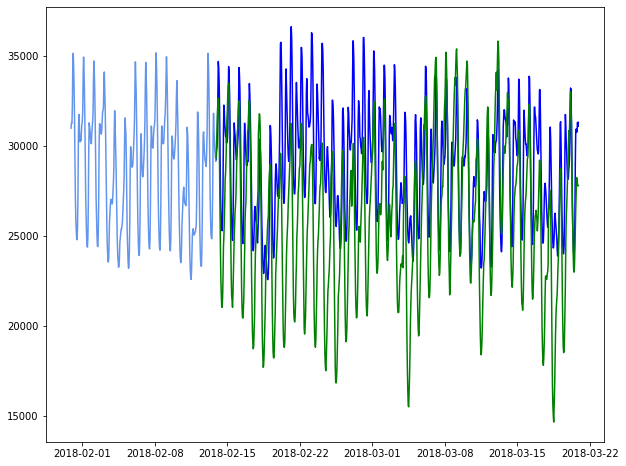

In [11]:
fig = plt.figure(figsize=[10,8])
plt.plot(X_walk1.index[:5*168], X_walk1['y'].values[:5*168], c='b', label='Validation Data')
plt.plot(X_train.index[-2*168:], X_train['y'].values[-2*168:], c='cornflowerblue', label='Training Data')
plt.plot(forecast.index[:5*168], forecast['yhat'].values[:5*168], c='green', label='Forecast')

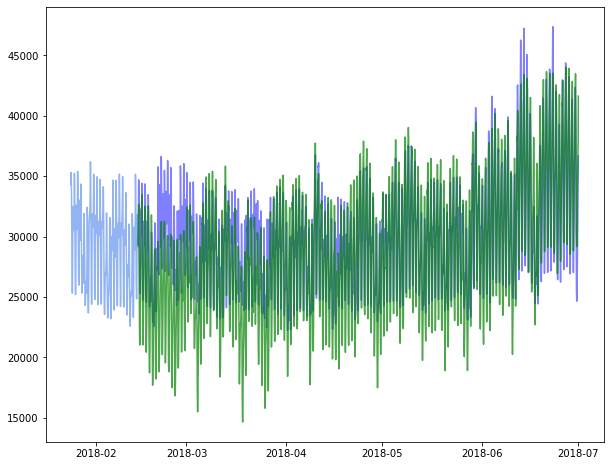

In [13]:
fig = plt.figure(figsize=[10,8])
plt.plot(X_walk1.index, X_walk1['y'].values, c='b', alpha=0.5)
plt.plot(X_train.index[-500:], X_train['y'].values[-500:], c='cornflowerblue', alpha=0.7)
plt.plot(forecast.index, forecast['yhat'].values, c='green', alpha=0.7)

In [14]:
residuals = [abs(X_walk1.loc[x, 'y'] - forecast.loc[x, 'yhat'])/ \
             X_walk1.loc[x, 'y'] * 100 for x in forecast.index]
timestamps = [int(x.timestamp()) for x in forecast.index]
z = np.polyfit(timestamps, residuals, 3)
poly_trend = np.poly1d(z)
trend = [poly_trend(x) for x in timestamps]

In [15]:
mape = np.mean(residuals[:3*168])
print(mape)

14.510124411505211


(0, 50)

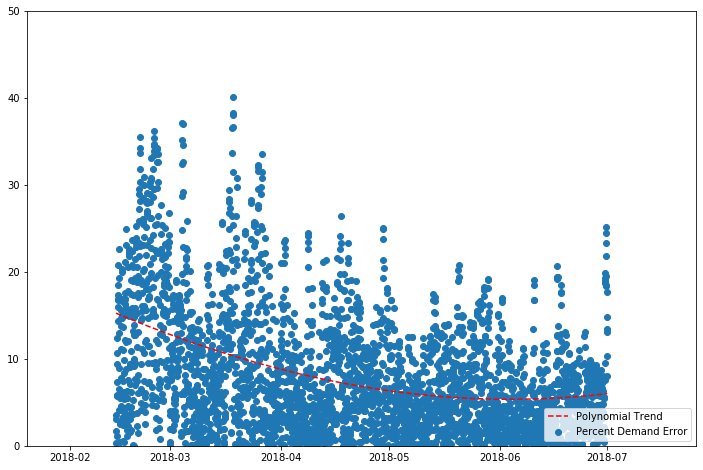

In [16]:
fig = plt.figure(figsize=[12,8])
plt.scatter(forecast.index, residuals, label='Percent Demand Error')
plt.plot(forecast.index, trend,"r--", label='Polynomial Trend')
plt.legend(loc='lower right')
plt.ylim(0, 50)

In [20]:
X_train = X_train.append(X_walk1)

In [21]:
m2 = Prophet(daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True)
m2.add_regressor('Los Angeles')
m2.add_regressor('San Diego')
m2.add_regressor('Fresno')
m2.add_regressor('Mon')
m2.add_regressor('Tue')
m2.add_regressor('Wed')
m2.add_regressor('Thur')
m2.add_regressor('Fri')
m2.add_regressor('Sat')
m2.fit(X_train)

In [22]:
future2=X_walk2.loc[:, 'Los Angeles':'ds']

In [25]:
forecast2 = m2.predict(future2)
forecast2.index = pd.DatetimeIndex(forecast2['ds'])

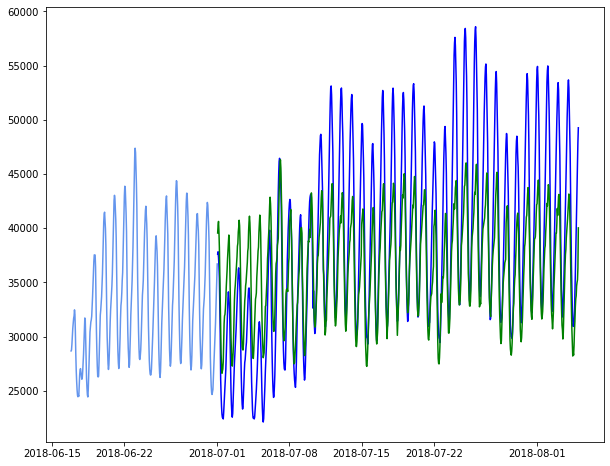

In [26]:
fig = plt.figure(figsize=[10,8])
plt.plot(X_walk2.index[:5*168], X_walk2['y'].values[:5*168], c='b', label='Validation Data')
plt.plot(X_train.index[-2*168:], X_train['y'].values[-2*168:], c='cornflowerblue', label='Training Data')
plt.plot(forecast2.index[:5*168], forecast2['yhat'].values[:5*168], c='green', label='Forecast')

In [28]:
residuals = [abs(X_walk2.loc[x, 'y'] - forecast2.loc[x, 'yhat'])/ \
             X_walk2.loc[x, 'y'] * 100 for x in forecast2.index]
timestamps = [int(x.timestamp()) for x in forecast2.index]
z = np.polyfit(timestamps, residuals, 3)
poly_trend = np.poly1d(z)
trend = [poly_trend(x) for x in timestamps]

In [29]:
mape = np.mean(residuals[:3*168])
print(mape)

11.382252554698594


(0, 50)

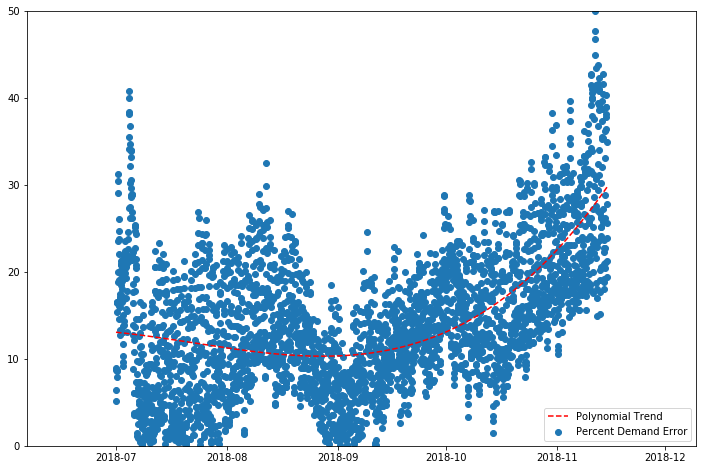

In [30]:
fig = plt.figure(figsize=[12,8])
plt.scatter(forecast2.index, residuals, label='Percent Demand Error')
plt.plot(forecast2.index, trend,"r--", label='Polynomial Trend')
plt.legend(loc='lower right')
plt.ylim(0, 50)

In [31]:
X_train = X_train.append(X_walk2)

In [33]:
m3 = Prophet(daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True)
m3.add_regressor('Los Angeles')
m3.add_regressor('San Diego')
m3.add_regressor('Fresno')
m3.add_regressor('Mon')
m3.add_regressor('Tue')
m3.add_regressor('Wed')
m3.add_regressor('Thur')
m3.add_regressor('Fri')
m3.add_regressor('Sat')
m3.fit(X_train)

In [34]:
future2=X_walk3.loc[:, 'Los Angeles':'ds']

In [35]:
forecast3 = m3.predict(future2)
forecast3.index = pd.DatetimeIndex(forecast3['ds'])

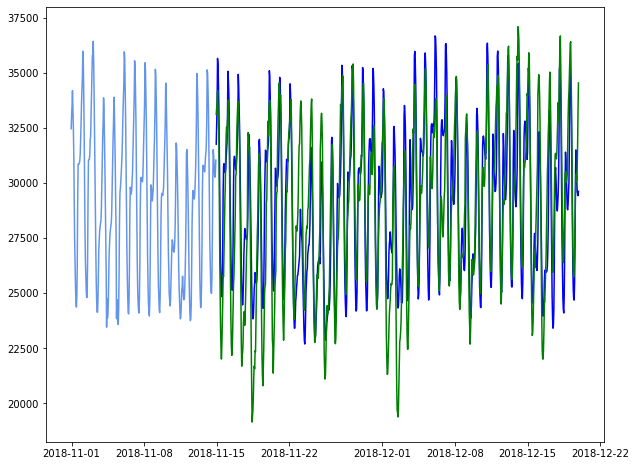

In [36]:
fig = plt.figure(figsize=[10,8])
plt.plot(X_walk3.index[:5*168], X_walk3['y'].values[:5*168], c='b', label='Validation Data')
plt.plot(X_train.index[-2*168:], X_train['y'].values[-2*168:], c='cornflowerblue', label='Training Data')
plt.plot(forecast3.index[:5*168], forecast3['yhat'].values[:5*168], c='green', label='Forecast')

In [42]:
residuals = [abs(X_walk3.loc[x, 'y'] - forecast3.loc[x, 'yhat'])/ \
             X_walk3.loc[x, 'y'] * 100 for x in forecast3.index]
timestamps = [int(x.timestamp()) for x in forecast3.index]
z = np.polyfit(timestamps, residuals, 3)
poly_trend = np.poly1d(z)
trend = [poly_trend(x) for x in timestamps]

In [43]:
mape = np.mean(residuals[:3*168])
print(mape)

6.304354367312497


(0, 50)

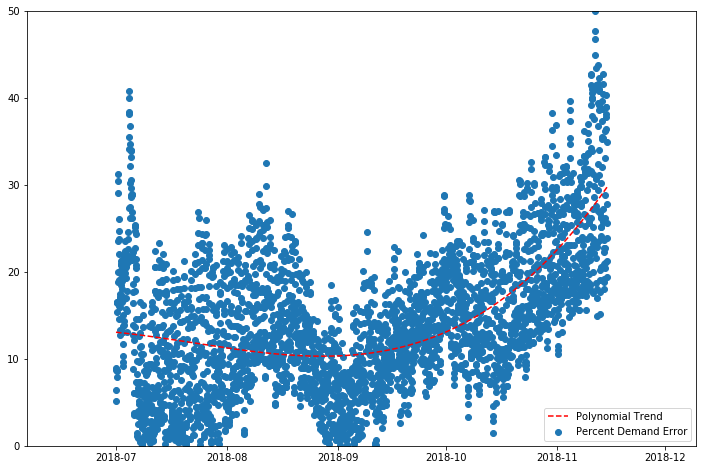

In [39]:
fig = plt.figure(figsize=[12,8])
plt.scatter(forecast2.index, residuals, label='Percent Demand Error')
plt.plot(forecast2.index, trend,"r--", label='Polynomial Trend')
plt.legend(loc='lower right')
plt.ylim(0, 50)

(array([434., 814., 875., 670., 290., 118.,  44.,  34.,   3.,   4.]),
 array([2.97175912e-02, 5.51011103e+00, 1.09905045e+01, 1.64708979e+01,
        2.19512913e+01, 2.74316848e+01, 3.29120782e+01, 3.83924716e+01,
        4.38728651e+01, 4.93532585e+01, 5.48336519e+01]),
 <a list of 10 Patch objects>)

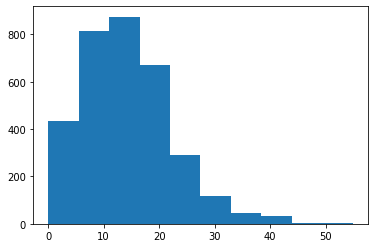

In [40]:
plt.hist(residuals)